In [47]:
#@title
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%matplotlib inline

# plotly packages
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *

import plotly.graph_objects as go

In [2]:
data = pd.read_csv("https://covid19.manaus.am.gov.br/wp-content/uploads/Manaus.csv",sep=';', parse_dates=["_dt_notificacao"],dayfirst=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Remoção dos casos diferentes de "Confirmado"

In [3]:
indexParaRemover = data[data['_classificacao'] != 'Confirmado'].index
data.drop(indexParaRemover, inplace=True)

In [4]:
data.head()

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_etnia,_evolução,_idade,_faixa etária,_gestante,_profiss_saude,_raca,_se_notificacao,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
130,02/03/2020 00:00,2020-02-23,15/02/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,12.0,10a - 14a,NaN,NaN,Parda,9.0,F,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,1.0,MAUAZINHO,MAUAZINHO,LESTE,"0,35040998"
144,01/03/2020 00:00,2020-02-28,26/02/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,39.0,30a - 39a,NaN,NaN,Parda,9.0,F,Sim,Sim,Sim,Sim,Sim,Vírus Sincicial Respiratório,NaN,NaN,1.0,NOVO ALEIXO,NOVO ALEIXO,NORTE,"0,085452557"
153,05/04/2020 00:00,2020-03-02,23/02/2020 00:00,Confirmado,Recuperado,"SIVEP, eSUS VE,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,2.0,1a - 4a,NaN,NaN,Parda,10.0,F,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,1.0,NaN,NaN,PRACA 14 DE JANEIRO,PRAÇA 14 DE JANEIRO,SUL,"0,861920359"
158,14/03/2020 00:00,2020-03-02,29/02/2020 00:00,Confirmado,Recuperado,"SIVEP, eSUS VE,",Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Laboratorial,NaN,Internado em UTI,71.0,70a - 79a,NaN,NaN,Parda,10.0,F,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,2.0,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
196,14/03/2020 00:00,2020-03-11,09/03/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clínico,NaN,Internado,46.0,40a - 49a,NaN,NaN,NaN,11.0,F,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,2.0,CIDADE NOVA,CIDADE NOVA,NORTE,"0,068152389"


In [5]:
data.tail()

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_etnia,_evolução,_idade,_faixa etária,_gestante,_profiss_saude,_raca,_se_notificacao,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
243970,NaN,2020-03-31,28/03/2020 00:00,Confirmado,NaN,GAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,40a - 49a,NaN,NaN,NaN,14.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
243973,NaN,2020-04-07,30/03/2020 00:00,Confirmado,NaN,GAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,40a - 49a,NaN,NaN,NaN,15.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NOVO ISRAEL,NOVO ISRAEL,NORTE,"0,490725292"
243977,NaN,2020-04-15,07/04/2020 00:00,Confirmado,NaN,GAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,50a - 59a,NaN,NaN,NaN,16.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Nova Esperança,NOVA ESPERANÇA,OESTE,"0,466526709"
243979,NaN,2020-04-20,01/04/2020 00:00,Confirmado,NaN,GAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50a - 59a,NaN,NaN,NaN,17.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Adrianópolis,ADRIANÓPOLIS,SUL,"0,99960016"
243982,NaN,2020-04-22,13/04/2020 00:00,Confirmado,NaN,GAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,60a - 69a,NaN,NaN,NaN,17.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,FLORES,FLORES,SUL,"0,198306463"


1. Quantos atributos descrevem cada exemplo? Quais são eles?

In [6]:
data.shape

(80420, 39)

**Resposta**: Cada exemplo possui 39 atributos, sendo eles informados na célula a seguir:

In [7]:
data.columns

Index(['_dt_evolucao', '_dt_notificacao', '_dt_sintomas', '_classificacao',
       '_conclusao', '_origem', '_comorb_cardio', '_comorb_cromossomica',
       '_comorb_diabetes', '_comorb_hemato', '_comorb_hepatica',
       '_comorb_imuno', '_comorb_neurologica', '_comorb_obessidade',
       '_comorb_renal', '_comorb_respiratoria', '_criterio', '_etnia',
       '_evolução', '_idade', '_faixa etária', '_gestante', '_profiss_saude',
       '_raca', '_se_notificacao', '_sexo', '_sintoma_dispneia',
       '_sintoma_febre', '_sintoma_garganta', '_sintoma_tosse',
       '_sintoma_outros', '_srag', '_teste_anticorpo', '_teste_antigeno',
       '_teste_pcr', '_bairro', '_bairro_mapa', '_distrito', '_taxa'],
      dtype='object')

2. Quantos casos confirmados há em Manaus, cumulativamente?

In [8]:
data['_classificacao'].value_counts()

Confirmado    80420
Name: _classificacao, dtype: int64

**Resposta:** No dataset constam 80420 casos confirmados, 126563 casos descartados e 37001 casos em análise

3. A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

In [41]:
data["_dt_notificacao"].min(), data["_dt_notificacao"].max()

(Timestamp('2020-02-16 00:00:00'), Timestamp('2020-12-29 00:00:00'))

**Resposta:** O período de tempo da base de dados é de 16/02/2020 até 29/12/2020.

# **2.1 Visão Geral dos Casos Confirmados**

### Na etapa abaixo, foi realizada a limpeza dos atributos não desejados para a análise: 

In [10]:

data.drop(columns=['_dt_evolucao', '_dt_sintomas', '_origem', '_comorb_cardio',
       '_comorb_cromossomica', '_comorb_diabetes', '_comorb_hemato',
       '_comorb_hepatica', '_comorb_imuno', '_comorb_neurologica',
       '_comorb_obessidade', '_comorb_renal', '_comorb_respiratoria', '_etnia',
       '_gestante', '_profiss_saude', '_raca', '_se_notificacao',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_garganta',
       '_sintoma_tosse', '_sintoma_outros', '_srag','_criterio','_evolução','_faixa etária','_bairro_mapa','_distrito','_taxa'],inplace=True)


In [11]:
data['_teste_pcr'].fillna(0.0,inplace=True)
data['_teste_anticorpo'].fillna(0.0,inplace=True)
data['_teste_antigeno'].fillna(0.0,inplace=True)
data['_teste_pcr'] = [int(x > 0.0) for x in data._teste_pcr]
data['_teste_anticorpo'] = [int(x > 0.0) for x in data._teste_anticorpo]
data['_teste_antigeno'] = [int(x > 0.0) for x in data._teste_antigeno]

In [12]:
data.isna()

,_dt_notificacao,_classificacao,_conclusao,_idade,_sexo,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro
130,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False
158,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
243970,False,False,True,False,False,False,False,False,True
243973,False,False,True,False,False,False,False,False,False
243977,False,False,True,False,False,False,False,False,False
243979,False,False,True,False,False,False,False,False,False


In [13]:
num_ausentes = data.isna().sum()
porc_ausentes = data.isna().sum() * 100 / len(data)
df_ausentes = pd.DataFrame({
    'Coluna': data.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
_dt_notificacao,_dt_notificacao,25,0.031087
_classificacao,_classificacao,0,0.000000
_conclusao,_conclusao,37646,46.811738
_idade,_idade,25,0.031087
_sexo,_sexo,119,0.147973
_teste_anticorpo,_teste_anticorpo,0,0.000000
_teste_antigeno,_teste_antigeno,0,0.000000
_teste_pcr,_teste_pcr,0,0.000000
_bairro,_bairro,771,0.958717


In [14]:
df = data.dropna(axis=0)
print(f"""\
Nº de linhas do DF original: {len(data)}
Nº de linhas do DF novo: {len(df)}
Nº de linhas com pelo menos 1 valor ausente: {
(len(data) - len(df))}""")

Nº de linhas do DF original: 80420
Nº de linhas do DF novo: 42685
Nº de linhas com pelo menos 1 valor ausente: 37735


In [15]:
df.columns

Index(['_dt_notificacao', '_classificacao', '_conclusao', '_idade', '_sexo',
       '_teste_anticorpo', '_teste_antigeno', '_teste_pcr', '_bairro'],
      dtype='object')

### 1. Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [16]:
print('Exemplos após Limpeza: ', df.shape[0])
print('Atributos após Limpeza: ', data.shape[1])

Exemplos após Limpeza:  42685
Atributos após Limpeza:  9


**Resposta:** Exemplos após a limpeza e organização: 42685. Atributos após a limpeza e organização: 9.

### 2. Qual a porcentagem de indivíduos recuperados em relação ao todo?

In [17]:
df['_conclusao'].value_counts(normalize=True)

Recuperado                 0.920394
Óbito                      0.078294
Óbito por outras causas    0.001312
Name: _conclusao, dtype: float64

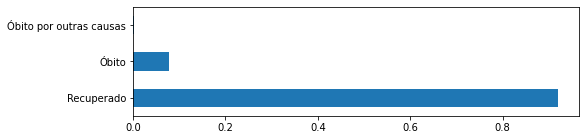

In [18]:
df['_conclusao'].value_counts(normalize=True).plot.barh(figsize=(8, 2))

**Resposta:** 92,03% de indivíduos recuperados.

### 3.Os casos acometeram mais indivíduos do sexo masculino ou feminino?


In [19]:
df['_sexo'].value_counts(normalize=True)

F    0.536535
M    0.463465
Name: _sexo, dtype: float64

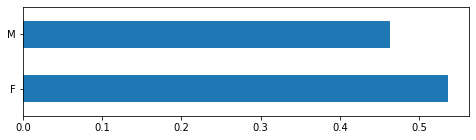

In [20]:
df['_sexo'].value_counts(normalize=True).plot.barh(figsize=(8, 2))

**Resposta:** Indivíduos do sexo masculino tiveram mais incidência de Covid-19 com uma porcentagem de 53,65% em relação a 46,34% para mulheres.

### 4. Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [21]:
df['_idade'].mean()

43.43167389012534

In [22]:
df['_idade'].std()

17.329733144236815

In [23]:
df['_idade'].min()

0.0

In [24]:
df['_idade'].max()

120.0

**Resposta:** 

*   A média das idades é de 43,43 anos.
*   O desvio padrão: 17,32.
*   O indivíduo mais jovem não completou 1 ano de vida ainda (um bebê).
*   Pela base de dados, a pessoa mais velha tem 120 anos. Como esse valor é atípico, visto que a pessoa mais velha do mundo chegou aos 122, é provável que esse valor seja outlier.

### 5. Qual o bairro com maior incidência de casos?


In [25]:
df['_bairro'].value_counts().head(1)


SAO JOSE OPERARIO    2350
Name: _bairro, dtype: int64

**Resposta:** São José Operário tem a maior incidência de casos, totalizando 2350.

### 6.  Quais os três bairros com maior incidência de casos recuperados?

In [42]:
df3 = df.loc[df['_conclusao'] == "Recuperado"]
df3['_bairro'].value_counts().head()

SAO JOSE OPERARIO    2233
JORGE TEIXEIRA       1862
COROADO              1709
ALVORADA             1680
COMPENSA             1657
Name: _bairro, dtype: int64

Os bairros com maior incidência de casos recuperados são: 
1. SÃO JOSÉ OPERÁRIO;
2. JORGE TEIXEIRA;
3. COROADO.

### 7. Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.

**Resposta:** Analizando as colunas, os tipos de testes efetuados são três, sendo eles o *Teste PCR*, *Teste de Anticorpo* e o *Teste de Antígeno*.

In [26]:
qt_pcr = df['_teste_pcr'].value_counts()
qt_anticorpo = df['_teste_anticorpo'].value_counts()
qt_antigeno = df['_teste_antigeno'].value_counts()
pc_pcr = df['_teste_pcr'].value_counts(normalize=True)
pc_anticorpo = df['_teste_anticorpo'].value_counts(normalize=True)
pc_antigeno = df['_teste_antigeno'].value_counts(normalize=True)

In [27]:
qt_testes = pd.DataFrame({
    'Teste PCR': qt_pcr,
    'Teste Anticorpo': qt_anticorpo,
    'Teste Antígeno': qt_antigeno
})
qt_testes = qt_testes.rename(index={0: 'Nº de Negativo', 1: 'Nº de Positivo'})
qt_testes

,Teste PCR,Teste Anticorpo,Teste Antígeno
Nº de Negativo,30636,15973,38504
Nº de Positivo,12049,26712,4181


In [28]:
pc_testes = pd.DataFrame({
    'Teste PCR': pc_pcr * 100,
    'Teste Anticorpo': pc_anticorpo * 100,
    'Teste Antígeno': pc_antigeno * 100
})
pc_testes = pc_testes.rename(index={0: 'Percentual de Negativo', 1: 'Percentual de Positivo'})
pc_testes.round(3)

,Teste PCR,Teste Anticorpo,Teste Antígeno
Percentual de Negativo,71.772,37.421,90.205
Percentual de Positivo,28.228,62.579,9.795


### 8. Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? 

- Taxa de letalidade do COVID-19 em Manaus: 


In [29]:
letalidade =  df['_conclusao'].value_counts()[1] / len(df) * 100
letalidade

7.829448283940494

**Resposta:** A taxa de letalidade foi de 7,829%.

- Letalidade no bairro com maior indice de casos:

In [43]:
bairro = df['_bairro'].value_counts().head(1).index[0]
qtd_casos = df['_bairro'].value_counts().head(1)[0]

bairro_df = df.loc[df['_bairro'] == bairro]
letalidade = bairro_df['_conclusao'].value_counts()[1] / qtd_casos

print("Taxa de Letalidade no bairro ({0}): {1:6.3f}%".format(bairro, letalidade*100))


Taxa de Letalidade no bairro (SAO JOSE OPERARIO):  4.936%


### 9. Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e qual sua intensidade.

In [30]:
grouped = df.groupby(['_idade']).size()
df1 = pd.DataFrame({"idade" : grouped.keys(), "quantidade_casos" : grouped})
df1["idade"] = [int(x) for x in df1["idade"]]
df1.index = range(0, 108)

In [44]:
df1['idade'].corr(df1['quantidade_casos'], method = "pearson")

-0.35546387559571613

In [45]:
df1['quantidade_casos'].corr(df1['idade'], method = "pearson")

-0.3554638755957161

**Resposta:** O coeficiente de correlação de Pearson, entre a idade e o número de casos é de -0.35, sugerindo uma correlação negativa e de intensidade fraca.


# **2.2 Visualização de Dados**

### 1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual.

In [33]:
bairros = df.
plt.hist()

SyntaxError: ignored

**Resposta:***

### 2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


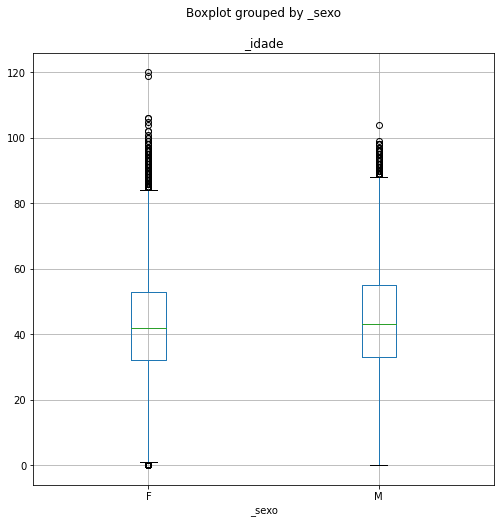

In [34]:
df.boxplot(by ='_sexo', column =['_idade'], grid = True, figsize=(8,8))

**Resposta:** Pela análise do gráfico boxplot, nota-se que existem 2 idades que destacam-se por distanciarem-se das demais para o sexo masculino, aproximadamente na idade de 120 anos. Para o sexo feminino ocorre algo parecido com um exemplo somente para a idade pouco maior que 100 anos. Portanto, há outliers.

### 3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados.

In [46]:
df7 = df.groupby('_dt_notificacao').size()
df7.index = [x.date() for x in df7.index]

In [48]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis = dict(
        tickmode = 'array',
        tickvals = df7.index,
        ticktext = df7.index
    ), 
    xaxis_title= "Data",
    yaxis_title = "Quantidade",
    title='Casos confirmados -- 10 últimos dias existentes na base de dados'   
)

novos_casos = df7.tail(10)
fig = go.Figure(go.Bar(name = "Confirmados", x = novos_casos.index, y = novos_casos))
fig['layout'] = layout
fig.show()

### 4. Repita o gráfico anterior considerando o número de casos recuperados.

In [49]:
df8 = df.loc[df['_conclusao'] == 'Recuperado']
df8 = df8.groupby('_dt_notificacao').size()
df8.index = [x.date() for x in df8.index]

In [50]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis = dict(
        tickmode = 'array',
        tickvals = df8.index,
        ticktext = df8.index
    ), 
    xaxis_title= "Data",
    yaxis_title = "Quantidade",
    title='Casos recuperados -- 10 últimos dias existentes na base de dados'   
)

casos_recuperados = df8.tail(10)
fig = go.Figure(go.Bar(name = "Recuperados", x = casos_recuperados.index, y = casos_recuperados))
fig['layout'] = layout
fig.show()

### 5. Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.).

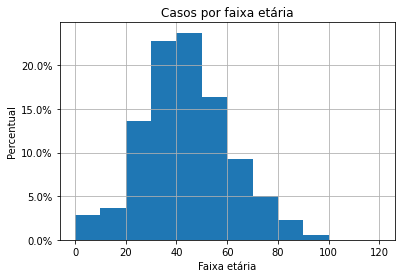

In [35]:
from matplotlib.ticker import PercentFormatter

plt.hist(df['_idade'], weights=np.ones(len(df['_idade'])) / len(df['_idade']), bins=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Faixa etária')
plt.ylabel('Percentual')
plt.title('Casos por faixa etária')
plt.grid(True)
plt.show()

### 6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo.

In [51]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_title= "Data",
    yaxis_title = "Quantidade",
    title='Casos confirmados -- período entre 4/01/2020 até 29/12/2020'    
)


fig = go.Figure(go.Scatter(x = df7.index, y = df7, mode='lines+markers'))
fig.update_traces(marker_size=5)
fig['layout'] = layout
fig.show()

### 7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?

# **2.3 Tipos de tarefas**



### 1. Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser aplicadas? Que tipo de validação seria apropriado?

**Resposta:** A partir dos dados, uma tafera de classificação possível seria prever se um paciente viria a óbito ou recuperar-se-ia. Seu atributo alvo seria *Conclusão*, ou a coluna da base de dados '_conclusao'. Como a tafera é de classificação, a métrica Acurária junto com a Matriz de Confusão poderiam ser empregadas para o modelo. O método de validação K-fold poderia ser utilizado.

### 2. Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais atributos preditores a equipe considera relevantes para o cenário?

**Resposta:** Uma tafera de regressão seria prever a idade de um paciente a partir dos dados disponibilizados. Os atributos preditores importantes estão listados abaixo.

*   Data da evolução
*   Data da notificação
*   Data dos sintomas
*   Comorbidade renal
*   Comorbidade obessidade
*   Comorbidade neurológica
*   Comorbidade imunológica
*   Comorbidade hematológica
*   Comorbidade cardiológica
*   Sexo
*   Conclusão
*   Evolução
*   Raça
*   Sintoma dispneia
*   Sintoma febre
*   Sintoma tosse
*   Sintoma outros
*   Teste anticorpo
*   Teste antígeno
*   Teste PCR